In [2]:
import pandas_datareader.data as pdr
import yfinance as yf

#yf.pdr_override()
#pdr.get_data_yahoo('AAPL')
yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
...,...,...,...,...,...,...
2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59357400
2024-09-17,215.750000,216.899994,214.500000,216.789993,216.789993,45519300
2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900


In [ ]:
#台積電(2330.TW),聯電(2303.TW),聯發科(2454.TW),鴻海(2317.TW)
yf.download('2330.TW')

In [6]:
all_data = {ticker:yf.download(ticker) for ticker in ['2330.TW','2303.TW','2454.TW','2317.TW']}
all_data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'2330.TW':                   Open        High  ...   Adj Close        Volume
 Date                                ...                          
 2000-01-04   69.649033   69.649033  ...   34.216953  200662336736
 2000-01-05   69.649033   71.214043  ...   34.985813  402466805912
 2000-01-06   70.822884   71.214043  ...   34.216953  197545715802
 2000-01-07   67.301331   68.475182  ...   33.255753  235270344752
 2000-01-10   69.649033   70.431351  ...   34.409119  276171685539
 ...                ...         ...  ...         ...           ...
 2024-09-16  952.000000  952.000000  ...  947.000000      13626239
 2024-09-18  945.000000  948.000000  ...  941.000000      28424324
 2024-09-19  940.000000  960.000000  ...  960.000000      32739630
 2024-09-20  981.000000  982.000000  ...  973.000000      60133709
 2024-09-23  971.000000  977.000000  ...  977.000000      15003591
 
 [6160 rows x 6 columns],
 '2303.TW':                  Open       High        Low      Close  Adj Close     Volume
 

In [12]:
#dict->tuple
for key,data in {'2330':'台積電','2303':'聯電'}.items():
    print(key,data)

2330 台積電
2303 聯電


In [14]:
#ticker:df['Adj Close']->dict->DataFrame
import pandas as pd
all_data1 = {ticker:df['Adj Close'] for ticker,df in all_data.items()}
prices_df = pd.DataFrame(all_data1)
prices_df

,2330.TW,2303.TW,2454.TW,2317.TW
Date,,,,
1993-01-05,NaN,NaN,NaN,0.399521
1993-01-06,NaN,NaN,NaN,0.392806
1993-01-07,NaN,NaN,NaN,0.391128
1993-01-08,NaN,NaN,NaN,0.379377
1993-01-11,NaN,NaN,NaN,0.381895
...,...,...,...,...
2024-09-16,947.0,54.500000,1130.0,181.000000
2024-09-18,941.0,53.799999,1105.0,174.000000
2024-09-19,960.0,53.700001,1120.0,176.500000


In [17]:
#改欄位名
prices_df.columns = ['台積電','聯電','聯發科','鴻海']
#把NaN去除不顯示
prices_df1 = prices_df.dropna()
prices_df1

,台積電,聯電,聯發科,鴻海
Date,,,,
2001-07-23,19.979666,11.343293,27.977865,15.367789
2001-07-24,19.807318,11.311159,29.767593,15.063484
2001-07-25,20.324032,11.600367,31.842106,15.469894
2001-07-26,20.840738,11.921703,34.007641,15.976390
2001-07-27,21.874157,12.178776,33.912834,15.672091
...,...,...,...,...
2024-09-16,947.000000,54.500000,1130.000000,181.000000
2024-09-18,941.000000,53.799999,1105.000000,174.000000
2024-09-19,960.000000,53.700001,1120.000000,176.500000


In [18]:
#DatatimeIndex即索引為datatime
prices_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5756 entries, 2001-07-23 to 2024-09-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   台積電     5756 non-null   float64
 1   聯電      5756 non-null   float64
 2   聯發科     5756 non-null   float64
 3   鴻海      5756 non-null   float64
dtypes: float64(4)
memory usage: 224.8 KB


In [19]:
#針對值做搜尋
prices_df1.query('台積電>=500')

,台積電,聯電,聯發科,鴻海
Date,,,,
2021-01-05,503.837616,37.238041,599.886658,88.711243
2021-01-06,510.344696,37.720089,596.123230,89.564224
2021-01-07,525.218262,37.117535,601.392029,91.270218
2021-01-08,539.162109,38.443161,630.746582,92.123215
2021-01-11,542.880493,40.170490,640.531372,91.696716
...,...,...,...,...
2024-09-16,947.000000,54.500000,1130.000000,181.000000
2024-09-18,941.000000,53.799999,1105.000000,174.000000
2024-09-19,960.000000,53.700001,1120.000000,176.500000


In [20]:
prices_df1.loc['2023-01-01':'2024-01-01']

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-01-03,437.941528,36.567986,554.369080,92.169456
2023-01-04,434.557892,36.258835,547.482422,91.239395
2023-01-05,443.258698,36.435490,543.178345,91.146393
2023-01-06,443.258698,37.451271,568.142212,91.518417
2023-01-09,465.010742,39.306168,581.054504,92.169456
...,...,...,...,...
2023-12-25,573.515564,47.553146,948.339111,100.912506
2023-12-26,578.451111,48.121510,953.104614,101.400002
2023-12-27,584.373840,50.679150,991.228821,100.912506


In [21]:
#datatime才可這樣做
prices_df1.loc['2023']

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-01-03,437.941528,36.567986,554.369080,92.169456
2023-01-04,434.557892,36.258835,547.482422,91.239395
2023-01-05,443.258698,36.435490,543.178345,91.146393
2023-01-06,443.258698,37.451271,568.142212,91.518417
2023-01-09,465.010742,39.306168,581.054504,92.169456
...,...,...,...,...
2023-12-25,573.515564,47.553146,948.339111,100.912506
2023-12-26,578.451111,48.121510,953.104614,101.400002
2023-12-27,584.373840,50.679150,991.228821,100.912506


In [24]:
prices_df1_202305 = prices_df1.loc['2023-05']
prices_df1_202305

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-05-02,486.966400,44.031738,577.611267,98.586914
2023-05-03,482.106476,44.120068,585.358643,98.121880
2023-05-04,484.050446,43.855087,575.028809,97.656845
2023-05-05,485.994415,43.810917,581.054504,97.656845
2023-05-08,489.882355,44.164234,581.054504,97.656845
2023-05-09,495.714325,44.120068,582.776184,99.051949
2023-05-10,488.910370,43.678425,575.028809,99.051949
2023-05-11,485.022430,43.457603,575.028809,97.656845
2023-05-12,482.106476,43.015961,579.332886,95.331680


In [27]:
#pct_change()實體方法,下一筆相較於前一筆變動百分比
prices_pce_change = prices_df1_202305.pct_change()
prices_pce_change

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-05-02,NaN,NaN,NaN,NaN
2023-05-03,-0.009980,0.002006,0.013413,-0.004717
2023-05-04,0.004032,-0.006006,-0.017647,-0.004739
2023-05-05,0.004016,-0.001007,0.010479,0.000000
2023-05-08,0.008000,0.008065,0.000000,0.000000
2023-05-09,0.011905,-0.001000,0.002963,0.014286
2023-05-10,-0.013726,-0.010010,-0.013294,0.000000
2023-05-11,-0.007952,-0.005056,0.000000,-0.014085
2023-05-12,-0.006012,-0.010163,0.007485,-0.023810


In [26]:
#shift()往下移一筆
prices_df1_202305-prices_df1_202305.shift(1)

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-05-02,NaN,NaN,NaN,NaN
2023-05-03,-4.859924,0.088329,7.747375,-0.465034
2023-05-04,1.943970,-0.264980,-10.329834,-0.465034
2023-05-05,1.943970,-0.044170,6.025696,0.000000
2023-05-08,3.887939,0.353317,0.000000,0.000000
2023-05-09,5.831970,-0.044167,1.721680,1.395103
2023-05-10,-6.803955,-0.441643,-7.747375,0.000000
2023-05-11,-3.887939,-0.220821,0.000000,-1.395103
2023-05-12,-2.915955,-0.441643,4.304077,-2.325165


In [28]:
#變動百分比的相關係數
prices_pce_change.corr()

,台積電,聯電,聯發科,鴻海
台積電,1.000000,0.545928,0.228962,0.175470
聯電,0.545928,1.000000,0.356633,0.437122
聯發科,0.228962,0.356633,1.000000,0.227070
鴻海,0.175470,0.437122,0.227070,1.000000


<Axes: xlabel='Date'>

/home/vscode/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32879 (\N{CJK UNIFIED IDEOGRAPH-806F}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30332 (\N{CJK UNIFIED IDEOGRAPH-767C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/vscode/.local/lib/python3.11/site-

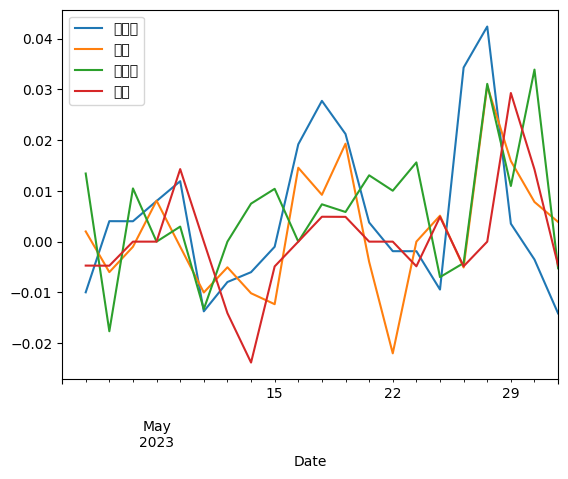

In [30]:
#dataframe.plot()自動繪圖,欄位legend,索引x軸
prices_pce_change.plot()